In [1]:
import my_module as mm
nets = []
convs = [8, 16, 32, 64, 128]
fcs = [128, 64, 32, 16]
device = mm.torch.device('cuda' if mm.torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [2]:
count = 0
DIR_PATH = './model/second_trial/'
for i in range(3, -1, -1):
    for j in range(1, 6):
        net = mm.Net2(1, 350, 350, 8, convs[:j], fcs[i:])
        count += 1
        PATH = DIR_PATH + "model_" + str(count) + ".pth"
        net.load_state_dict(mm.torch.load(PATH))
        nets.append(net)
print("Done")

Done


In [3]:
categories = [
    "anger",
    "surprise",
    "disgust",
    "fear",
    "neutral",
    "happiness",
    "sadness",
    "contempt"
]

X, y = mm.read_pic(mm.pd.read_csv('data/legend.csv'), categories)
seed = 1234
Xtr, Xva, ytr, yva = mm.train_test_split(X, y, test_size=0.2, random_state=seed)
trainloader, testloader = mm.get_loader(Xtr, Xva, ytr, yva)
print("Done")

Done


In [4]:
training_error = []
testing_error = []
count = 0
for net in nets:
    if mm.torch.cuda.is_available():
        net.cuda()
    training_error.append(1 - mm.accuracy(device, net, trainloader))
    testing_error.append(1 - mm.accuracy(device, net, testloader))
    count += 1
    print("Done for model", count)

Done for model 1
Done for model 2
Done for model 3
Done for model 4
Done for model 5
Done for model 6
Done for model 7
Done for model 8
Done for model 9
Done for model 10
Done for model 11
Done for model 12
Done for model 13
Done for model 14
Done for model 15
Done for model 16
Done for model 17
Done for model 18
Done for model 19
Done for model 20


[0.8266983199415632, 0.7342037983929877, 0.4962563915266618, 0.5475712198685172, 0.537527392257122, 0.6210737764791818, 0.9506939371804237, 0.4970781592403214, 0.49762600438276117, 0.5042914536157779, 0.793644996347699, 0.5418188458728999, 0.49643900657414175, 0.5251095690284879, 0.497991234477721, 0.5125091307523739, 0.5634587289992695, 0.56254565376187, 0.497808619430241, 0.50009130752374]
[0.8151935719503287, 0.7337472607742879, 0.5065741417092768, 0.54163623082542, 0.5420014609203798, 0.6179693206720234, 0.9503287070854638, 0.5073046018991965, 0.5094959824689554, 0.5080350620891161, 0.7804967129291454, 0.537618699780862, 0.5065741417092768, 0.5127830533235939, 0.5080350620891161, 0.5230094959824689, 0.56245434623813, 0.5566106647187729, 0.5073046018991965, 0.5087655222790358]


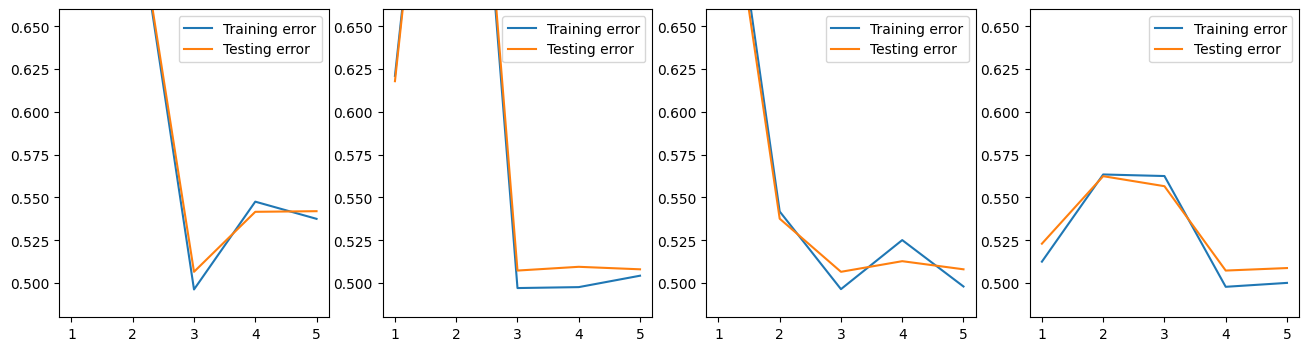

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,4, figsize=(16,4))

print(training_error)
print(testing_error)

M = [1, 2, 3, 4, 5]

for i in range(4):
    l = i * 5
    r = i * 5 + 5
    ax[i].plot(M, training_error[l:r], label="Training error")
    ax[i].plot(M, testing_error[l:r], label="Testing error")
    ax[i].legend()
    ax[i].set_ylim(0.48, 0.66)

# The output is wrong, just for debugging